# Telecom Churn Case Study

## ----------------------------------------------


## Group
    

- Sheela Bhatia  (sheela.k1@gmail.com)
- Sharath Menon  (sharath92@gmail.com)


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data as 'df'

df = pd.read_csv('C:/Users/VIJAY/Downloads/telecom_churn_data.csv')

In [3]:
# Check columns

df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# There are 12 object type columns.  We will check which are these

df_object = df.select_dtypes(include=['object'])
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
date_of_last_rech_6         98392 non-null object
date_of_last_rech_7         98232 non-null object
date_of_last_rech_8         96377 non-null object
date_of_last_rech_9         95239 non-null object
date_of_last_rech_data_6    25153 non-null object
date_of_last_rech_data_7    25571 non-null object
date_of_last_rech_data_8    26339 non-null object
date_of_last_rech_data_9    25922 non-null object
dtypes: object(12)
memory usage: 9.2+ MB


#### All date columns are 'Object' type. we will convert them to 'datetime' while cleaning

In [6]:
# Check shape of data

df.shape

(99999, 226)

In [7]:
#checking duplicates on 'Mobile number' as unique key

sum(df.duplicated(subset = 'mobile_number')) == 0

True

#### There are no duplicates with respect to mobile number

In [8]:
### Handle Date columns. Before converting dtype, we will check nulls in date columns

print(round(100*(df_object.isnull().sum()/len(df_object.index)), 2))

last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
date_of_last_rech_9          4.76
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
dtype: float64


In [9]:
# Treat nulls in date columns

df.last_date_of_month_7.fillna(value='7/31/2014',inplace=True)
df.last_date_of_month_8.fillna(value='8/31/2014',inplace=True)
df.last_date_of_month_9.fillna(value='9/30/2014',inplace=True)
df.date_of_last_rech_6.fillna(value='6/1/2014',inplace=True)
df.date_of_last_rech_7.fillna(value='7/1/2014',inplace=True)
df.date_of_last_rech_8.fillna(value='8/1/2014',inplace=True)
df.date_of_last_rech_9.fillna(value='9/1/2014',inplace=True)


In [10]:
# isolate object type columns

df_object = df.select_dtypes(include=['object'])
df_object = df_object.apply(pd.to_datetime)

In [11]:
df = df.drop(df_object.columns, axis=1)
df = pd.concat([df, df_object], axis=1)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to date_of_last_rech_data_9
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


In [13]:
# VBC Columns is Volume based cost - when no specific scheme is not purchased and paid as per usage
# We will convert them as per the standard followed for assigning month names as numeric

df.rename(columns={"jun_vbc_3g":"vbc_3g_6", "jul_vbc_3g":"vbc_3g_7", "aug_vbc_3g":"vbc_3g_8", "sep_vbc_3g":"vbc_3g_9"}, inplace=True)

In [14]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>50]
null.sort_values(inplace=True, ascending=False)
null

total_rech_data_6           74.846748
max_rech_data_6             74.846748
count_rech_3g_6             74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
count_rech_2g_6             74.846748
night_pck_user_6            74.846748
av_rech_amt_data_6          74.846748
fb_user_6                   74.846748
date_of_last_rech_data_6    74.846748
max_rech_data_7             74.428744
night_pck_user_7            74.428744
fb_user_7                   74.428744
arpu_2g_7                   74.428744
total_rech_data_7           74.428744
count_rech_2g_7             74.428744
arpu_3g_7                   74.428744
date_of_last_rech_data_7    74.428744
count_rech_3g_7             74.428744
av_rech_amt_data_7          74.428744
count_rech_3g_9             74.077741
total_rech_data_9           74.077741
count_rech_2g_9             74.077741
max_rech_data_9             74.077741
date_of_last_rech_data_9    74.077741
arpu_3g_9                   74.077741
arpu_2g_9   

#### High null values are mostly related to 'Data Recharge'.  This means that null values describe that no data recharge is done for those customers.  Hence, we can impute these values by '0'

In [15]:
# Group high null columns (other than date columns) for imputing to check the range
columns = ['total_rech_data_6', 'count_rech_2g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'max_rech_data_6', 'arpu_2g_6', 
           'count_rech_3g_6', 'night_pck_user_6', 'fb_user_6', 'total_rech_data_7', 'arpu_2g_7', 'night_pck_user_7', 
           'arpu_3g_7', 'max_rech_data_7', 'av_rech_amt_data_7', 'fb_user_7', 'count_rech_2g_7', 'count_rech_3g_7',
           'count_rech_2g_9', 'max_rech_data_9', 'total_rech_data_9', 'fb_user_9', 'av_rech_amt_data_9', 'arpu_3g_9',
           'arpu_2g_9', 'night_pck_user_9', 'count_rech_3g_9', 'count_rech_2g_8', 'count_rech_3g_8', 'fb_user_8',
           'av_rech_amt_data_8', 'max_rech_data_8', 'arpu_3g_8', 'total_rech_data_8', 'arpu_2g_8', 'night_pck_user_8']

In [16]:
df[columns].describe()

,total_rech_data_6,count_rech_2g_6,av_rech_amt_data_6,arpu_3g_6,max_rech_data_6,arpu_2g_6,count_rech_3g_6,night_pck_user_6,fb_user_6,total_rech_data_7,...,count_rech_3g_9,count_rech_2g_8,count_rech_3g_8,fb_user_8,av_rech_amt_data_8,max_rech_data_8,arpu_3g_8,total_rech_data_8,arpu_2g_8,night_pck_user_8
count,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25571.000000,...,25922.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000
mean,2.463802,1.864668,192.600982,89.555057,126.393392,86.398003,0.599133,0.025086,0.914404,2.666419,...,0.659363,2.016288,0.635711,0.890808,197.526489,125.717301,91.173849,2.651999,86.599478,0.020844
std,2.789128,2.570254,192.646318,193.124653,108.477235,172.767523,1.274428,0.156391,0.279772,3.031593,...,1.411513,2.720132,1.422827,0.311885,191.301305,109.437851,188.180936,3.074987,168.247852,0.142863
min,1.000000,0.000000,1.000000,-30.820000,1.000000,-35.830000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,-24.490000,1.000000,-55.830000,0.000000
25%,1.000000,1.000000,82.000000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,87.000000,25.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,154.000000,0.480000,145.000000,10.830000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,154.000000,145.000000,0.880000,1.000000,9.270000,0.000000
75%,3.000000,2.000000,252.000000,122.070000,177.000000,122.070000,1.000000,0.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,252.000000,179.000000,122.070000,3.000000,122.070000,0.000000
max,61.000000,42.000000,7546.000000,6362.280000,1555.000000,6433.760000,29.000000,1.000000,1.000000,54.000000,...,49.000000,44.000000,45.000000,1.000000,4076.000000,1555.000000,3716.900000,60.000000,3483.170000,1.000000


In [17]:
# some are categorical columns with values 0 & 1, others being numeric 
# hence will impute categorical columns with nulls as '-1' and other numeric missing values by '0'
columns_cat = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
               'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'] 

In [18]:
# replace Null in categorical as '-1'
df[columns_cat] = df[columns_cat].fillna(-1)

In [19]:
columns_num = ['total_rech_data_6', 'count_rech_2g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'max_rech_data_6', 
               'arpu_2g_6', 'count_rech_3g_6', 'total_rech_data_7', 'arpu_2g_7', 'arpu_3g_7', 'max_rech_data_7',
               'av_rech_amt_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_9', 'max_rech_data_9', 
               'total_rech_data_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9',  'count_rech_3g_9', 
               'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'arpu_3g_8',
               'total_rech_data_8', 'arpu_2g_8']

In [20]:
#we can drop these columns too after we derive some features for analysis
df[columns_num] = df[columns_num].fillna(0)

In [21]:
# Let's now find which columns have very low variance 
col = df.nunique()
col = pd.DataFrame(col)
col_one = col.loc[col[0] == 1]
col_one

,0
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1
std_og_t2c_mou_8,1
std_og_t2c_mou_9,1
std_ic_t2o_mou_6,1
std_ic_t2o_mou_7,1


In [22]:
#Recheck high null columns after imputing

df.columns[df.isnull().any()] 

null1 = df.isnull().sum()/len(df)*100
null1 = null1[null1>50]
null1.sort_values(inplace=True, ascending=False)
null1

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
dtype: float64

In [23]:
## The below mentioned columns have very low variance (mostly zeros) hence, we can drop them
drop_col = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

df.drop(drop_col, axis=1, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to date_of_last_rech_9
dtypes: datetime64[ns](8), float64(168), int64(34)
memory usage: 160.2 MB


### Filter High Value customers

In [25]:
# Filter high value customers using total recharge for the months 6 & 7

df['total_rech_data_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rech_data_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

df['avg_rech_amnt_good_ph'] = (df['total_rech_amt_6']  + df['total_rech_data_amt_6'] + df['total_rech_amt_7'] + df['total_rech_data_amt_7'])/ 4




# Find the 70th percentile of the average recharge amount in the first two months
threshold = df['avg_rech_amnt_good_ph'].quantile(0.7)

print("The threshold amount for high value customer is ", threshold)

The threshold amount for high value customer is  239.0


In [26]:
# Filter the data on the basis of 70 percentile 
high_value = df.loc[df.avg_rech_amnt_good_ph > threshold]

In [27]:
high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 213 entries, mobile_number to avg_rech_amnt_good_ph
dtypes: datetime64[ns](8), float64(171), int64(34)
memory usage: 48.9 MB


### Extract churned customers based on 9th month data

In [28]:
# define a new column 'Churn' (non-churn as 0)
high_value['Churn'] = 0

In [29]:
# customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

churned = (high_value.total_ic_mou_9 == 0) & (high_value.total_og_mou_9 == 0) & (high_value.vol_2g_mb_9 ==0)& \
(high_value.vol_3g_mb_9 ==0)

In [30]:
# Assign Churned customers as '1'
high_value.loc[churned,'Churn']=1

In [31]:
high_value.Churn.value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

In [32]:
# let us check what's the % of churned customers
100*high_value.Churn.sum()/len(churned)

8.122725603445398

In [33]:
# After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names

month_9_columns =  high_value.columns[high_value.columns.str.contains('_9')]

In [34]:
high_value.drop(month_9_columns,axis=1,inplace=True)

In [35]:
# create function to anlyze the features across 6th, 7th and 8th month
def feature_check(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": high_value[high_value["Churn"] == Churn][cols[6]].mean(),
        "mean_7": high_value[high_value["Churn"] == Churn][cols[7]].mean(),
        "mean_8": high_value[high_value["Churn"] == Churn][cols[8]].mean(),
        "std_6": high_value[high_value["Churn"] == Churn][cols[6]].std(),
        "std_7": high_value[high_value["Churn"] == Churn][cols[7]].std(),
        "std_8": high_value[high_value["Churn"] == Churn][cols[8]].std()
    }) for Churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=high_value, y=feature_start + "_6", x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=high_value, y=feature_start + "_7",  x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=high_value, y=feature_start + "_8",  x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

### EDA and Derived Metrics

In [36]:
# derive column for days since last recharge for the specific months

import datetime as dt

high_value['days_since_last_rech_6'] = (high_value['last_date_of_month_6'] - high_value['date_of_last_rech_6']).dt.days
high_value['days_since_last_rech_7'] = (high_value['last_date_of_month_7'] - high_value['date_of_last_rech_7']).dt.days
high_value['days_since_last_rech_8'] = (high_value['last_date_of_month_8'] - high_value['date_of_last_rech_8']).dt.days


Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.97,663.89,613.98,547.95,574.45,615.04
Churned,787.33,627.46,253.69,682.48,668.66,452.97


<Figure size 1224x504 with 0 Axes>

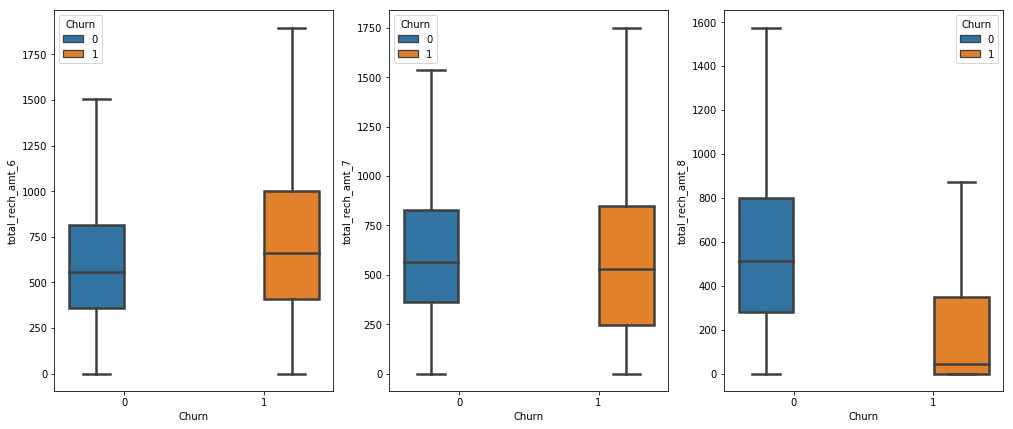

In [37]:
feature_check('total_rech_amt')

There is a drop in total recharge amount from Good phase to Action phase

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,169.10,173.40,166.83,172.1,176.85,171.42
Churned,172.18,159.66,85.54,209.4,227.28,176.90


<Figure size 1224x504 with 0 Axes>

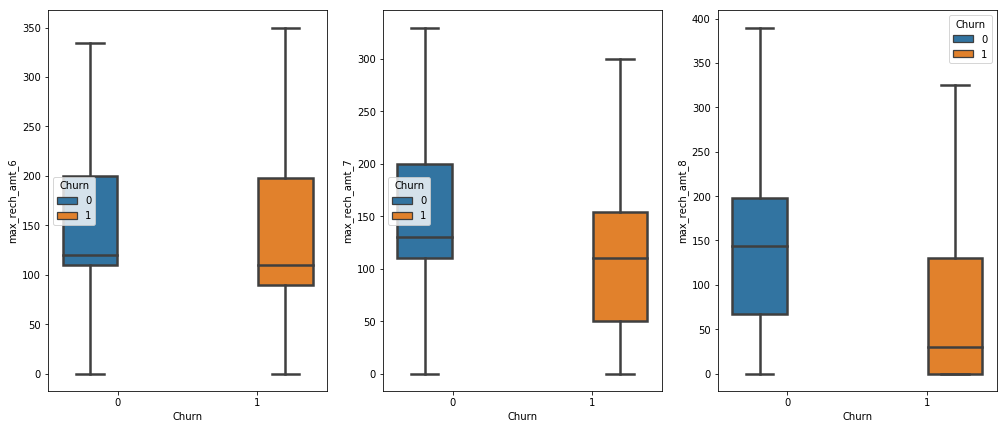

In [38]:
feature_check('max_rech_amt')

Significant reduction in max recharge amount is seen in the action phase

Churn Stats (mean and standard deviation):
{6: 'days_since_last_rech_6', 7: 'days_since_last_rech_7', 8: 'days_since_last_rech_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,3.59,3.6,4.29,4.79,4.49,5.60
Churned,3.64,6.2,10.71,5.27,7.19,9.88


<Figure size 1224x504 with 0 Axes>

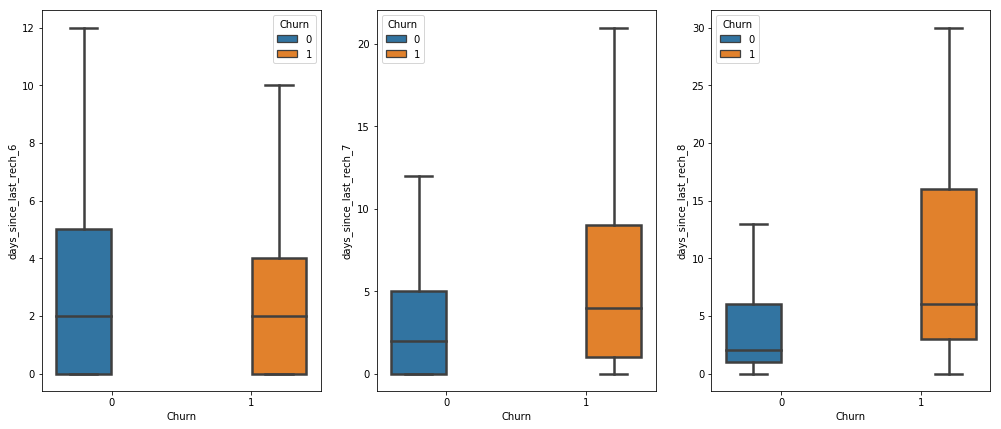

In [39]:
feature_check('days_since_last_rech')

More the gap in recharge, more is the chance of churn

Churn Stats (mean and standard deviation):
{6: 'arpu_6', 7: 'arpu_7', 8: 'arpu_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,549.55,562.93,532.87,447.04,474.24,504.10
Churned,663.71,541.15,237.66,585.31,540.94,386.96


<Figure size 1224x504 with 0 Axes>

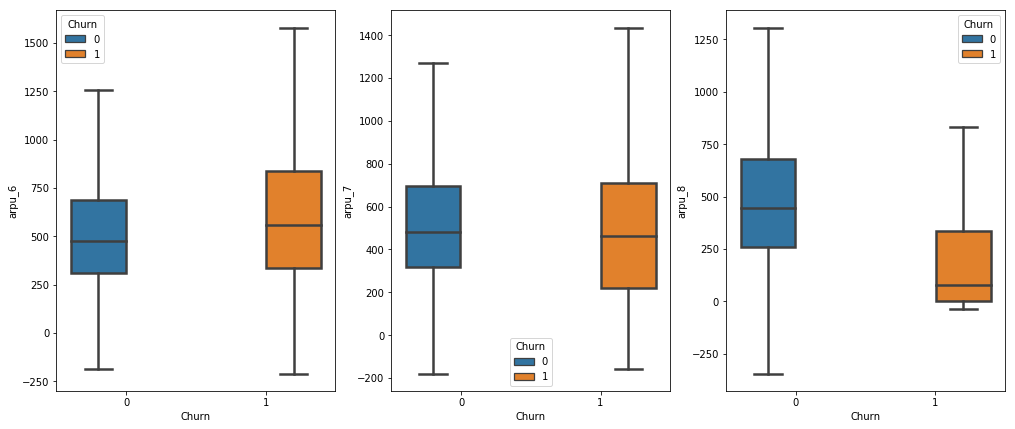

In [40]:
feature_check('arpu')

Reduction in average revenue for churning customers

Churn Stats (mean and standard deviation):
{6: 'offnet_mou_6', 7: 'offnet_mou_7', 8: 'offnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,370.37,382.35,357.43,464.57,490.69,491.69
Churned,503.40,419.14,205.50,665.50,612.86,369.74


<Figure size 1224x504 with 0 Axes>

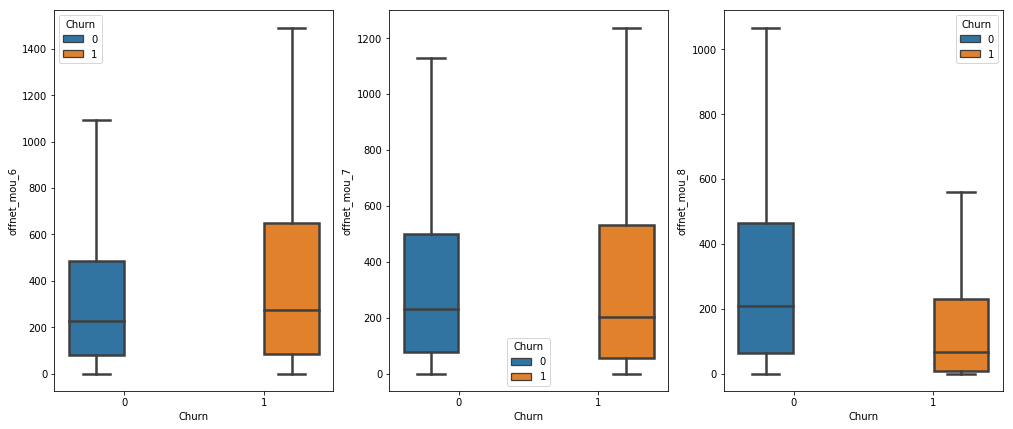

In [41]:
feature_check('offnet_mou')

Churn Stats (mean and standard deviation):
{6: 'onnet_mou_6', 7: 'onnet_mou_7', 8: 'onnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,254.99,269.01,248.45,445.16,476.35,468.61
Churned,393.23,321.09,168.35,621.25,559.26,403.45


<Figure size 1224x504 with 0 Axes>

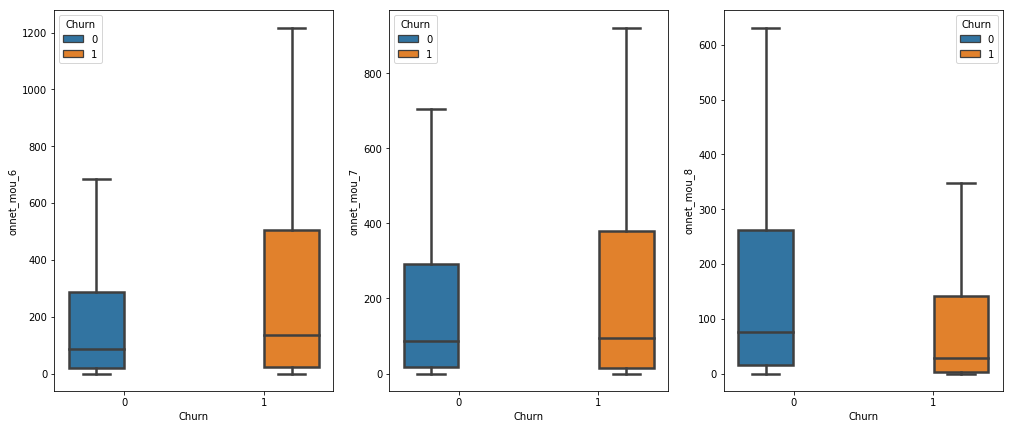

In [42]:
feature_check('onnet_mou')

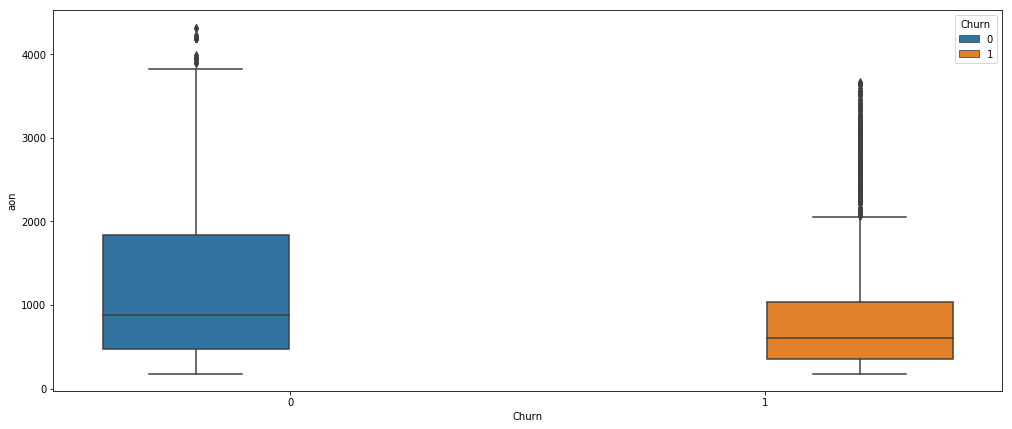

In [43]:
sns.boxplot(data=high_value, y='aon', x="Churn", hue="Churn")

Most of the churning customers churn before 1500 days

In [44]:
# Analysis on categorical features
count_fb_user_6 = high_value.groupby(['fb_user_6','Churn']).agg({'Churn':'count'})
count_fb_user_6

Churn
fb_user_6 Churn       
-1.0      0      11912
          1       1301
 0.0      0       1134
          1         95
 1.0      0      14474
          1       1037

In [45]:
# Analysis on categorical features
count_fb_user_7 = high_value.groupby(['fb_user_7','Churn']).agg({'Churn':'count'})
count_fb_user_7

Churn
fb_user_7 Churn       
-1.0      0      11436
          1       1479
 0.0      0       1245
          1         88
 1.0      0      14839
          1        866

In [46]:
# Analysis on categorical features
count_fb_user_8 = high_value.groupby(['fb_user_8','Churn']).agg({'Churn':'count'})
count_fb_user_8

Churn
fb_user_8 Churn       
-1.0      0      12044
          1       1974
 0.0      0       1527
          1        111
 1.0      0      13949
          1        348

#### Customers using fb_packs are less likely to churn

In [47]:
count_night_pck_user_6 = high_value.groupby(['night_pck_user_6','Churn']).agg({'Churn':'count'})
count_night_pck_user_6

Churn
night_pck_user_6 Churn       
-1.0             0      11912
                 1       1301
 0.0             0      15239
                 1       1094
 1.0             0        369
                 1         38

In [48]:
count_night_pck_user_7 = high_value.groupby(['night_pck_user_7','Churn']).agg({'Churn':'count'})
count_night_pck_user_7

Churn
night_pck_user_7 Churn       
-1.0             0      11436
                 1       1479
 0.0             0      15732
                 1        931
 1.0             0        352
                 1         23

In [49]:
count_night_pck_user_8 = high_value.groupby(['night_pck_user_8','Churn']).agg({'Churn':'count'})
count_night_pck_user_8

Churn
night_pck_user_8 Churn       
-1.0             0      12044
                 1       1974
 0.0             0      15144
                 1        450
 1.0             0        332
                 1          9

#### Number of night_pack users are not enough to draw any conclusion

In [50]:
# drop raw date columns
high_value.drop(['last_date_of_month_6', 'date_of_last_rech_6', 'last_date_of_month_7', 'date_of_last_rech_7', 'last_date_of_month_8', 'date_of_last_rech_8'], axis = 1, inplace = True)

In [51]:
high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 159 entries, mobile_number to days_since_last_rech_8
dtypes: float64(129), int64(30)
memory usage: 37.8 MB


In [52]:
# Check nulls again

null3 = high_value.isnull().sum()/len(df)*100
null3 = null3[null3>0]
null3.sort_values(inplace=True, ascending=False)
null3

ic_others_8         1.172012
loc_og_t2m_mou_8    1.172012
std_og_mou_8        1.172012
spl_og_mou_8        1.172012
std_og_t2f_mou_8    1.172012
og_others_8         1.172012
std_og_t2m_mou_8    1.172012
loc_ic_t2t_mou_8    1.172012
std_og_t2t_mou_8    1.172012
loc_ic_t2m_mou_8    1.172012
loc_og_mou_8        1.172012
loc_ic_t2f_mou_8    1.172012
loc_og_t2c_mou_8    1.172012
loc_ic_mou_8        1.172012
std_ic_t2t_mou_8    1.172012
loc_og_t2f_mou_8    1.172012
isd_og_mou_8        1.172012
loc_og_t2t_mou_8    1.172012
onnet_mou_8         1.172012
isd_ic_mou_8        1.172012
std_ic_t2f_mou_8    1.172012
roam_og_mou_8       1.172012
offnet_mou_8        1.172012
std_ic_mou_8        1.172012
std_ic_t2m_mou_8    1.172012
roam_ic_mou_8       1.172012
spl_ic_mou_8        1.172012
std_og_t2m_mou_6    0.542005
std_og_mou_6        0.542005
offnet_mou_6        0.542005
                      ...   
loc_ic_t2t_mou_6    0.542005
og_others_6         0.542005
ic_others_6         0.542005
spl_ic_mou_7  

In [53]:
high_value.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,avg_rech_amnt_good_ph,Churn,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000
mean,7.001206e+09,558.820058,561.160547,508.890301,265.708886,272.935850,243.888097,380.688975,385.124799,348.769656,...,169.276670,179.057629,158.731865,456.387566,528.958341,576.850858,0.081227,3.597570,3.81461,4.810770
std,6.908102e+05,460.868223,480.028497,502.136278,462.692744,483.282132,465.505577,484.441095,501.024091,486.836956,...,421.128001,443.756247,416.989501,1419.713940,1477.097887,679.766811,0.273188,4.831928,4.81836,6.307443
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,239.250000,0.000000,0.000000,0.00000,0.000000
25%,7.000609e+09,310.142000,310.071000,231.615000,19.250000,18.180000,14.280000,78.550000,76.180000,58.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,302.000000,0.000000,0.000000,0.00000,1.000000
50%,7.001203e+09,482.354000,481.496000,427.604000,88.140000,86.890000,72.990000,229.630000,227.130000,197.690000,...,0.000000,0.000000,0.000000,92.000000,100.000000,400.250000,0.000000,2.000000,2.00000,3.000000
75%,7.001804e+09,700.240000,698.829000,661.753000,297.490000,298.380000,255.310000,494.755000,500.480000,455.440000,...,129.130000,137.860000,98.750000,400.000000,575.000000,604.500000,0.000000,5.000000,5.00000,6.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,12916.220000,9165.600000,11166.210000,105644.000000,55080.000000,30618.000000,1.000000,29.000000,30.00000,30.000000


In [54]:
# Before treating nulls, we will check columns that are highly correlated

h_cor = high_value.corr()
h_cor.loc[:,:] = np.tril(h_cor, k=-1)
h_cor = h_cor.stack()
h_cor[(h_cor > 0.60) | (h_cor < -0.60)].sort_values()

monthly_3g_6        vol_3g_mb_6           0.601325
total_ic_mou_7      loc_ic_t2t_mou_7      0.601655
arpu_2g_6           arpu_3g_7             0.601886
fb_user_6           av_rech_amt_data_6    0.603006
total_rech_amt_8    arpu_6                0.604021
arpu_2g_7           arpu_3g_6             0.604890
roam_og_mou_8       roam_og_mou_7         0.605131
offnet_mou_8        offnet_mou_6          0.605156
total_ic_mou_8      loc_ic_t2t_mou_8      0.605215
std_ic_mou_6        std_ic_t2m_mou_7      0.606385
std_ic_mou_7        std_ic_t2m_mou_8      0.606808
loc_og_mou_6        loc_og_t2t_mou_7      0.607058
vbc_3g_8            vol_3g_mb_8           0.607485
arpu_3g_7           vol_3g_mb_8           0.607826
arpu_3g_6           count_rech_3g_6       0.607882
monthly_3g_8        max_rech_data_8       0.608168
total_rech_amt_8    total_rech_amt_6      0.609635
total_og_mou_6      std_og_t2t_mou_6      0.610419
total_rech_amt_6    arpu_8                0.611035
std_og_mou_7        std_og_t2t_

In [55]:
drop_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']
                 
high_value.drop(drop_list, axis=1, inplace=True)
high_value.shape

(29953, 120)

In [56]:

### Imputing null values
high_value = high_value.fillna(0) 
high_value.shape

(29953, 120)

In [57]:
# Check nulls again

null3 = high_value.isnull().sum()/len(df)*100
null3 = null3[null3>0]
null3.sort_values(inplace=True, ascending=False)
null3

Series([], dtype: float64)

#### No null values in the dataset 

### Outlier Treatment

In [58]:
#Handle outliers
high_value.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,avg_rech_amnt_good_ph,Churn,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000
mean,7.001206e+09,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,...,169.276670,179.057629,158.731865,456.387566,528.958341,576.850858,0.081227,3.597570,3.81461,4.810770
std,6.908102e+05,460.868223,480.028497,502.136278,459.853278,480.303238,458.751242,482.712621,499.138982,481.985106,...,421.128001,443.756247,416.989501,1419.713940,1477.097887,679.766811,0.273188,4.831928,4.81836,6.307443
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,239.250000,0.000000,0.000000,0.00000,0.000000
25%,7.000609e+09,310.142000,310.071000,231.615000,17.090000,16.040000,10.440000,71.610000,69.980000,46.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,302.000000,0.000000,0.000000,0.00000,1.000000
50%,7.001203e+09,482.354000,481.496000,427.604000,84.640000,82.830000,65.660000,222.560000,220.040000,182.840000,...,0.000000,0.000000,0.000000,92.000000,100.000000,400.250000,0.000000,2.000000,2.00000,3.000000
75%,7.001804e+09,700.240000,698.829000,661.753000,290.490000,290.540000,240.630000,487.910000,494.030000,438.860000,...,129.130000,137.860000,98.750000,400.000000,575.000000,604.500000,0.000000,5.000000,5.00000,6.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,12916.220000,9165.600000,11166.210000,105644.000000,55080.000000,30618.000000,1.000000,29.000000,30.00000,30.000000


In [59]:
high_value.columns.values

array(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 

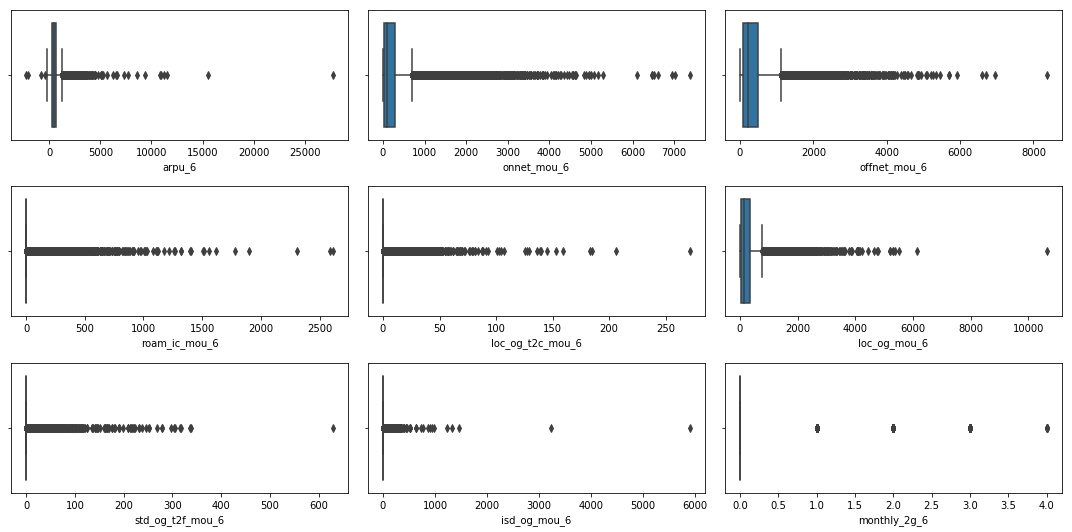

In [60]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(high_value['arpu_6'], ax = axs[0,0])
plt2 = sns.boxplot(high_value['onnet_mou_6'], ax = axs[0,1])
plt3 = sns.boxplot(high_value['offnet_mou_6'], ax = axs[0,2])
plt4 = sns.boxplot(high_value['roam_ic_mou_6'], ax = axs[1,0])
plt5 = sns.boxplot(high_value['loc_og_t2c_mou_6'], ax = axs[1,1])
plt6 = sns.boxplot(high_value['loc_og_mou_6'], ax = axs[1,2])
plt7 = sns.boxplot(high_value['std_og_t2f_mou_6'], ax = axs[2,0])
plt8 = sns.boxplot(high_value['isd_og_mou_6'], ax = axs[2,1])
plt9 = sns.boxplot(high_value['monthly_2g_6'], ax = axs[2,2])

plt.tight_layout()


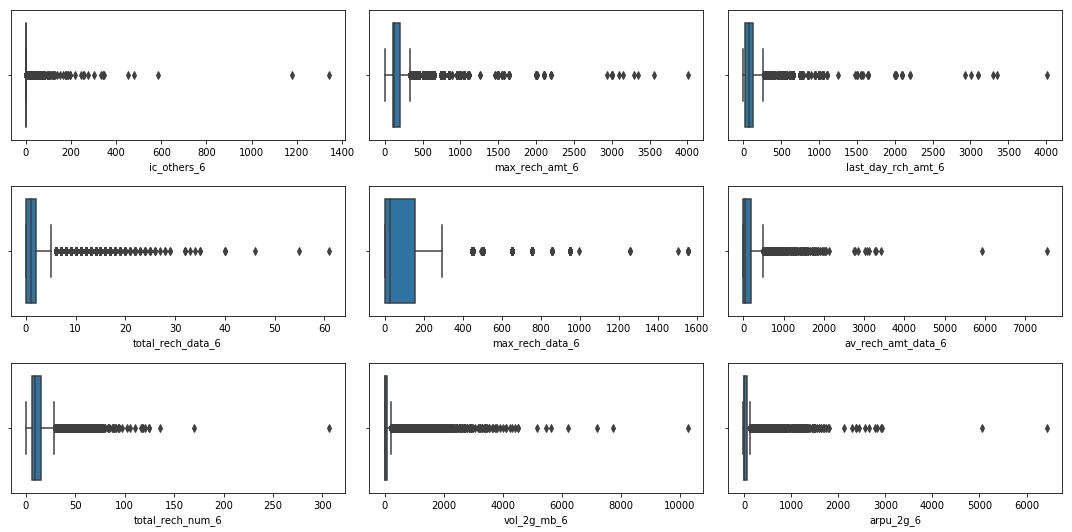

In [61]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(high_value['ic_others_6'], ax = axs[0,0])
plt2 = sns.boxplot(high_value['max_rech_amt_6'], ax = axs[0,1])
plt3 = sns.boxplot(high_value['last_day_rch_amt_6'], ax = axs[0,2])
plt4 = sns.boxplot(high_value['total_rech_data_6'], ax = axs[1,0])
plt5 = sns.boxplot(high_value['max_rech_data_6'], ax = axs[1,1])
plt6 = sns.boxplot(high_value['av_rech_amt_data_6'], ax = axs[1,2])
plt10 = sns.boxplot(high_value['total_rech_num_6'], ax = axs[2,0])
plt11 = sns.boxplot(high_value['vol_2g_mb_6'], ax = axs[2,1])
plt12 = sns.boxplot(high_value['arpu_2g_6'], ax = axs[2,2])

plt.tight_layout()

In [62]:
## Isolate columns that need to be treated for outlier analysis

num = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8','max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
      'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'total_rech_data_amt_6','total_rech_data_amt_7']

In [63]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit[0]
    array[array>upper_limit] = upper_limit[1]
    return array

In [64]:
high_value_treated = cap_outliers(high_value[num])

In [65]:
new_df = high_value.drop(high_value_treated.columns, axis=1)
new_df  = pd.concat([new_df, high_value_treated], axis=1)
new_df.head()

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,night_pck_user_6,...,vol_2g_mb_7,vol_2g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,total_rech_data_amt_6,total_rech_data_amt_7
0,7000842753,4,3,2,0.0,0.0,1.0,1.0,1.0,0.0,...,1.32,5.75,212.17,212.17,212.17,212.17,212.17,212.17,252.0,252.0
7,7000701601,5,5,7,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
8,7001524846,19,21,14,2.0,3.0,0.0,0.0,0.0,-1.0,...,356.00,0.03,0.00,0.00,19.83,0.00,0.00,0.00,0.0,354.0
21,7002124215,22,26,27,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
23,7000887461,3,5,4,0.0,0.0,0.0,2.0,2.0,-1.0,...,0.48,0.01,0.00,306.57,197.27,0.00,301.78,150.67,0.0,712.0


#### No outliers in the data now

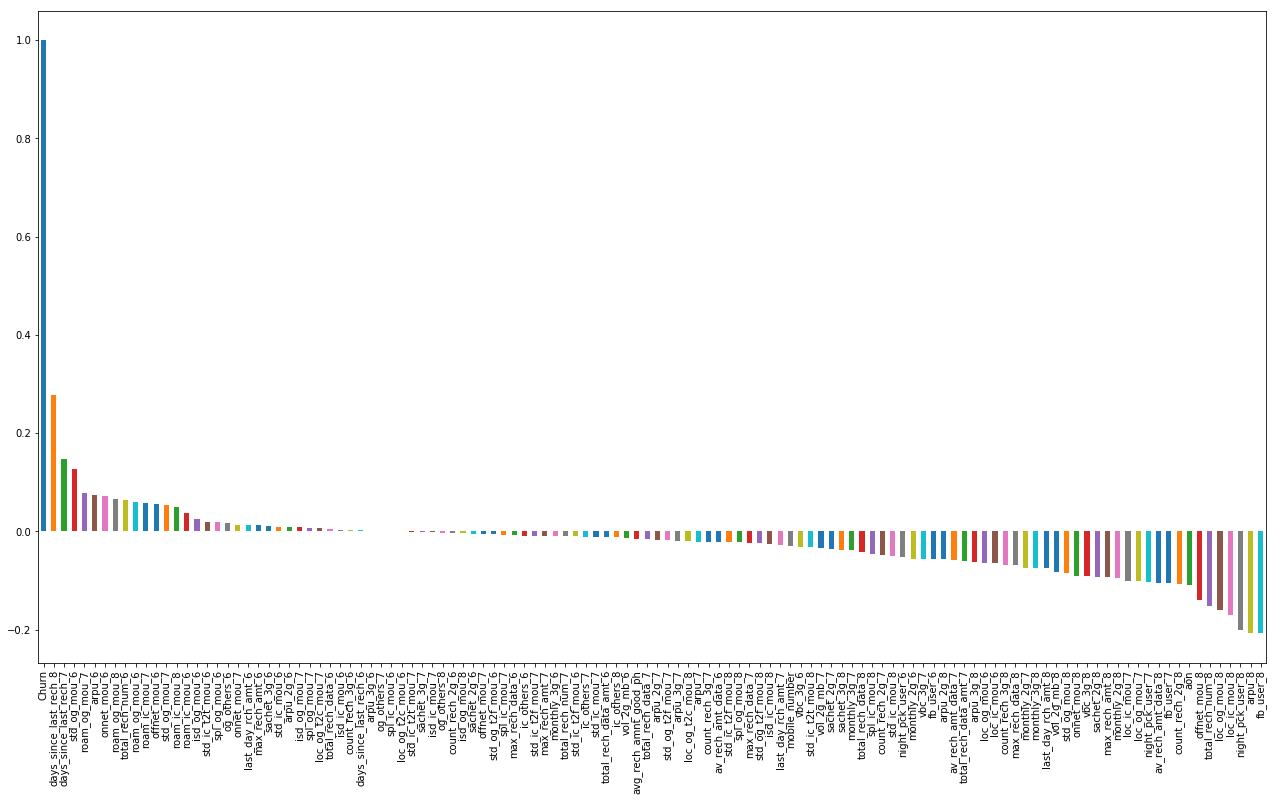

In [66]:
plt.figure(figsize=(22,12))
new_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Higher the number of days from last recharge, std outgoing, roaming outgoing higher is the chance Churn, and higher the chance of fb user, arpu, night pack user, high number of local incoming and outgoing calls, lower the churn rate

### We will combine the months 6 & 7 as they are good phase and keep the month 8 column as it is

In [67]:
final_df = new_df.copy()

In [68]:
col_goodph = final_df.filter(regex='_6|_7').columns.str[:-2]
col_goodph.unique()

print(final_df.shape)
print(col_goodph)


(29953, 120)
Index(['total_rech_num', 'total_rech_num', 'count_rech_2g', 'count_rech_3g',
       'count_rech_3g', 'night_pck_user', 'night_pck_user', 'monthly_2g',
       'monthly_2g', 'sachet_2g', 'sachet_2g', 'monthly_3g', 'monthly_3g',
       'sachet_3g', 'sachet_3g', 'fb_user', 'fb_user', 'vbc_3g', 'vbc_3g',
       'days_since_last_rech', 'days_since_last_rech', 'arpu', 'arpu',
       'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou', 'roam_ic_mou',
       'roam_ic_mou', 'roam_og_mou', 'roam_og_mou', 'loc_og_t2c_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'loc_og_mou', 'std_og_t2f_mou',
       'std_og_t2f_mou', 'std_og_mou', 'std_og_mou', 'isd_og_mou',
       'isd_og_mou', 'spl_og_mou', 'spl_og_mou', 'og_others', 'og_others',
       'loc_ic_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2t_mou',
       'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'std_ic_mou',
       'spl_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'isd_ic_mou', 'ic_others',
       'ic_others', 'max_rech_amt', 'm

In [69]:
for idx, col in enumerate(col_goodph.unique()):

    avg_name = "avg_"+col+"_avg6&7"
    column_6 = col+"_6"
    column_7 = col+"_7"
    final_df[avg_name] = (final_df[column_6]  + final_df[column_7])/ 2

In [70]:
print (final_df.shape)

col_goodph = final_df.filter(regex='_6|_7').columns

final_df.drop(col_goodph, axis=1, inplace=True)
final_df.shape

(29953, 159)


(29953, 81)

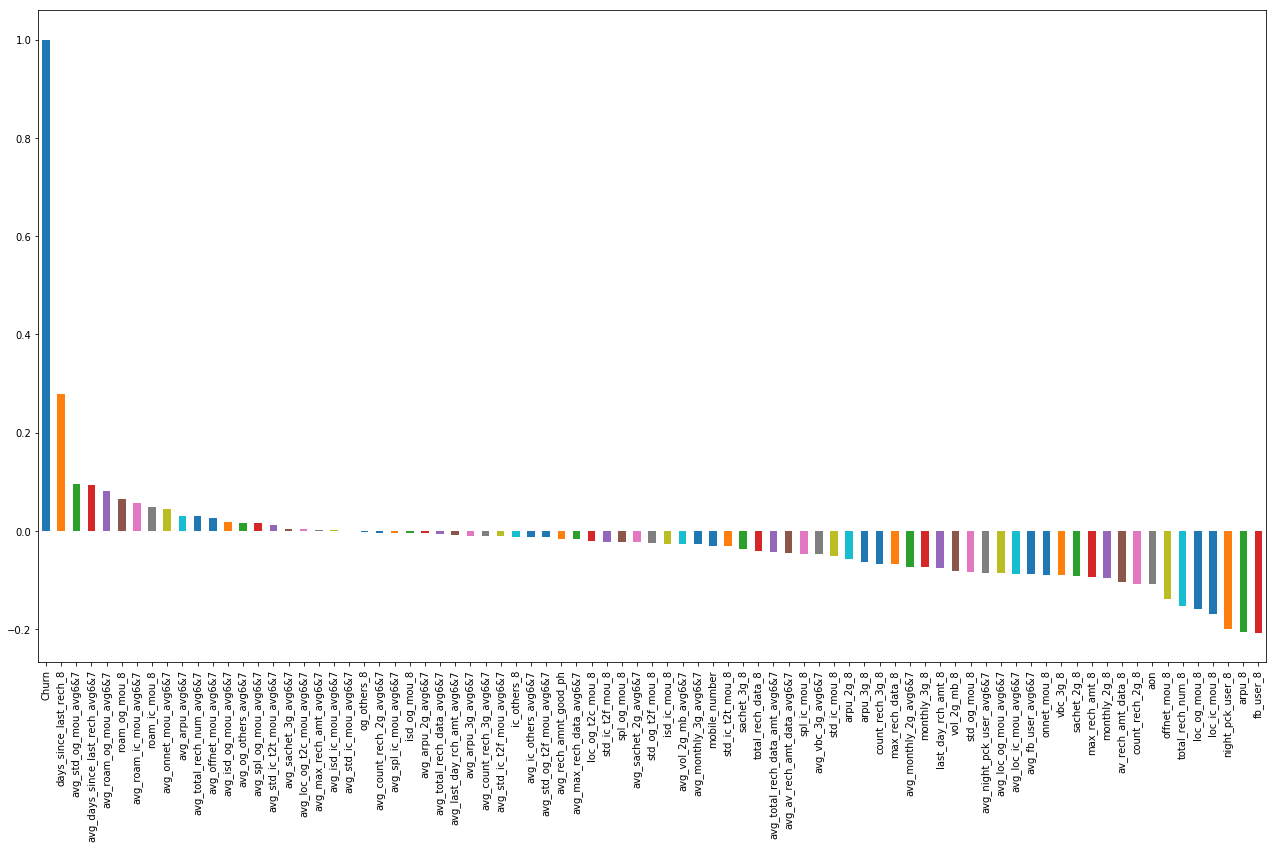

In [71]:
plt.figure(figsize=(22,12))
final_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Modelling

#### Narrow down the feature variables by using PCA

In [283]:
PCA_df = final_df._get_numeric_data()

In [284]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = PCA_df.drop(['Churn','mobile_number'],axis=1)

# Putting response variable to y
y = PCA_df['Churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

In [285]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [286]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train,y_train)

In [287]:
X_scaled=X_scaler.transform(X_train,y_train)

In [288]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [289]:
X_test_scaler = StandardScaler().fit(X_test,y_test)
Scaled_Xtest=X_test_scaler.transform(X_test,y_test)

In [290]:
y_pred = lr.predict(Scaled_Xtest)

In [291]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(mse)

4.323254179448861e+18


In [292]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)

-6.1724396134514745e+19


In [293]:
X_scaled.shape

(20967, 79)

In [294]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [295]:
#Doing the PCA on the train data
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [296]:
pca.components_

array([[-2.79619962e-02,  8.86914486e-02,  1.84396114e-01, ...,
         2.22231210e-01,  2.23128471e-01,  2.16641770e-01],
       [-1.49447940e-02, -2.30726552e-01,  2.44275074e-02, ...,
         1.54205937e-01,  1.48320290e-01, -1.25005778e-01],
       [ 3.13892438e-01,  1.91822735e-01,  1.36094632e-01, ...,
        -1.66825053e-04, -2.30938543e-03,  1.12186969e-01],
       ...,
       [ 1.21162146e-15, -6.44247970e-01, -2.41317232e-01, ...,
         3.81639165e-16, -3.72965547e-17, -1.94289029e-16],
       [-0.00000000e+00, -2.75532620e-01,  4.76623221e-01, ...,
        -3.05311332e-16,  2.86229374e-16,  3.40005801e-16],
       [-0.00000000e+00,  5.12958420e-02, -4.70659815e-01, ...,
         7.63278329e-17, -2.08166817e-17, -1.17961196e-16]])

In [297]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.027962,-0.014945,total_rech_num_8
1,0.088691,-0.230727,count_rech_2g_8
2,0.184396,0.024428,count_rech_3g_8
3,0.190035,-0.091537,night_pck_user_8
4,0.051666,-0.043983,monthly_2g_8


In [298]:
pca.explained_variance_ratio_

array([1.33389500e-01, 8.65806416e-02, 6.66021715e-02, 4.37741041e-02,
       3.63542109e-02, 3.45756891e-02, 3.10116138e-02, 2.76311446e-02,
       2.51799656e-02, 2.50302768e-02, 2.33173130e-02, 2.29053190e-02,
       2.19487688e-02, 2.06266021e-02, 1.84790622e-02, 1.63301914e-02,
       1.54396386e-02, 1.52163522e-02, 1.47440357e-02, 1.43685751e-02,
       1.34771620e-02, 1.29855992e-02, 1.24300499e-02, 1.19952597e-02,
       1.15538392e-02, 1.11596140e-02, 1.08628757e-02, 1.07165963e-02,
       1.03552009e-02, 1.01426038e-02, 9.89307609e-03, 9.17624518e-03,
       9.00490089e-03, 8.80530848e-03, 8.56710070e-03, 8.50052038e-03,
       7.57841865e-03, 7.36956349e-03, 7.07263556e-03, 6.73596727e-03,
       6.37458731e-03, 6.20880964e-03, 6.15010204e-03, 5.88101751e-03,
       5.68586452e-03, 5.32739512e-03, 4.61491426e-03, 4.42524085e-03,
       4.28871925e-03, 4.04418332e-03, 3.96781239e-03, 3.76056586e-03,
       3.70905071e-03, 3.62696905e-03, 3.48670468e-03, 3.21336987e-03,
      

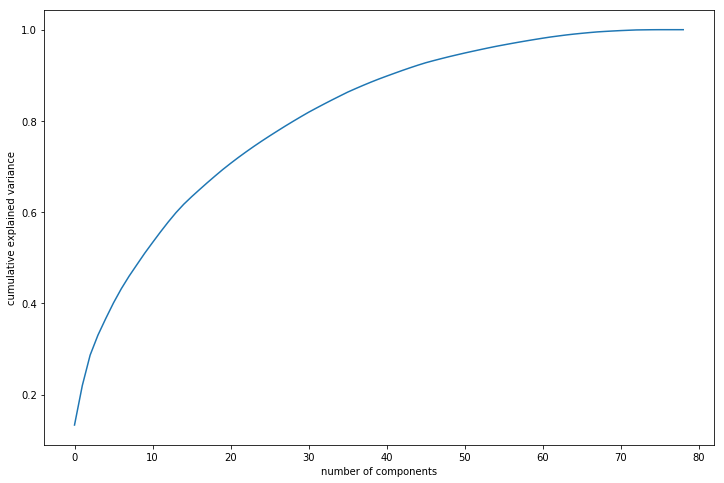

In [299]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### As per the scree plot, arount 45 variables explain 90% variance

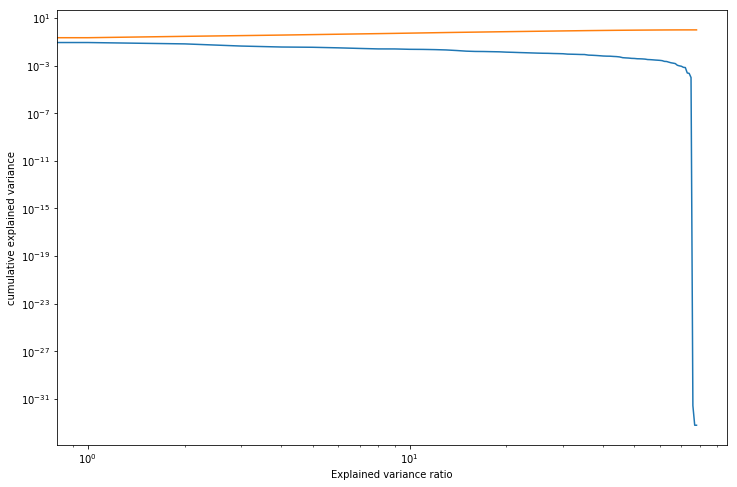

In [300]:
#Making the screeplot - plotting the cumulative variance against the explained variance ration
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.yscale('log')
plt.xscale('log')
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Explained variance ratio')
plt.ylabel('cumulative explained variance')
plt.show()

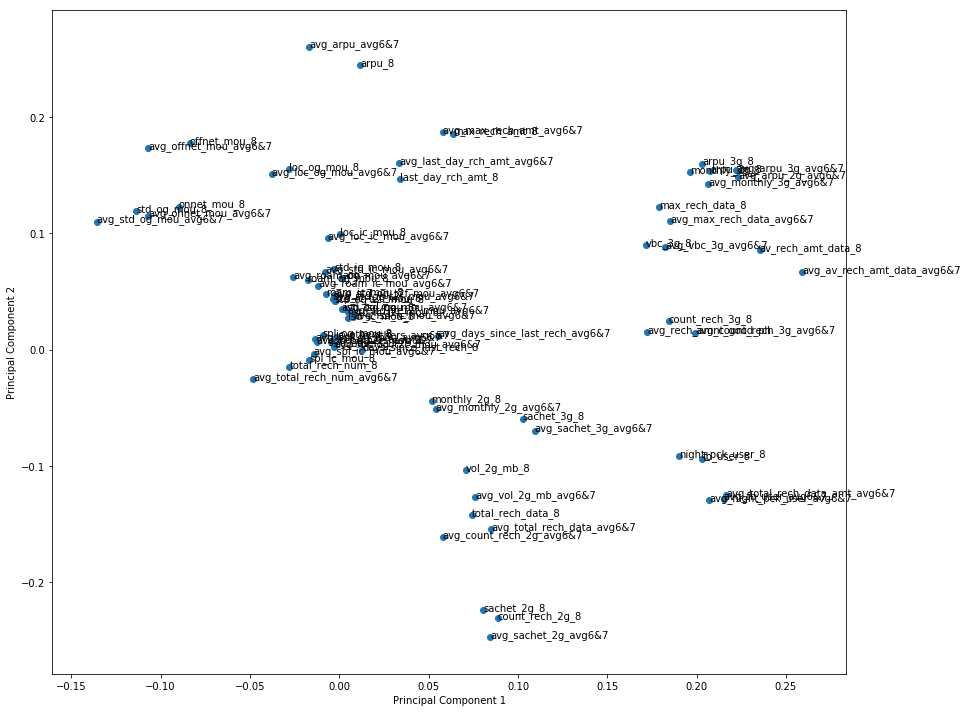

In [301]:
# Pattern
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [302]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [303]:
df_train_pca = pca_final.fit_transform(X_scaled)
df_train_pca.shape

(20967, 45)

In [304]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

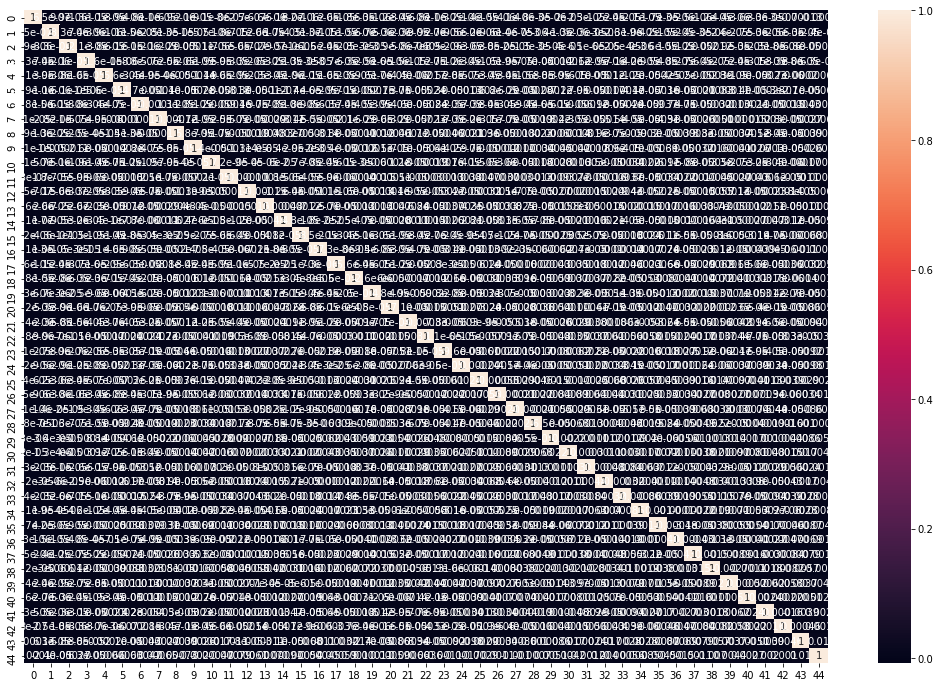

In [305]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (18,12))
sns.heatmap(corrmat,annot = True)

In [306]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.010402821407228776 , min corr:  -0.006982624809559201


####  we see that correlations are indeed very close to 0

### Apply logistic regression for classification

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [308]:
df_train_pca.shape

(20967, 45)

In [309]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(Scaled_Xtest)
df_test_pca.shape

(8986, 45)

In [310]:
#training the regression model
Lsr = LogisticRegression(class_weight='balanced')
model_pca2 = Lsr.fit(df_train_pca,y_train)

In [311]:
#Making prediction on the test data
pred_probs_test= model_pca2.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

### The Auc score with logistic regression is 89%

In [396]:
# Compare with statsmodel LR
import statsmodels.api as sm
logm4 = sm.GLM(y_train,(sm.add_constant(df_train_pca)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20921
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4010.8
Date:                Sun, 25 Aug 2019   Deviance:                       8021.6
Time:                        16:15:09   Pearson chi2:                 6.86e+04
No. Iterations:                    11   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7943      0.077    -49.321      0.000      -3.945      -3.644
x1            -0.1538      0.019     -8.257      0.000      -0.190      -0.117
x2            -0.1706      0.024     -7.116      0.000      -0.218      -0.124
x3            -0.3591      0.032    -11.272      0.000      -0.422      -0.297
x4            -0.7076      0.030    -23.466      0.000      -0.767      -0.649
x5             0.0943      0.048      1.971      0.049       0.001       0.188
x6            -0.3068      0.033     -9.286      0.000      -0.372      -0.242
x7             0.2705      0.039      7.004      0.000       0.195       0.346
x8            -0.0564      0.026     -2.185      0.029      -0.107      -0.006
x9             0.0861      0.042      2.065      0.039       0.004       0.168
x10           -0.1872      0.047     -3.978      0.000      -0.279      -0.095
x11            0.2741      0.057      4.771      0.000       0.162       0.387
x12           -0.1864      0.105     -1.772      0.076      -0.393       0.020
x13            0.1958      0.094      2.094      0.036       0.012       0.379
x14            0.0966      0.090      1.069      0.285      -0.081       0.274
x15            0.0402      0.048      0.840      0.401      -0.053       0.134
x16           -1.4669      1.072     -1.368      0.171      -3.569       0.635
x17           -0.3379      0.151     -2.244      0.025      -0.633      -0.043
x18            0.7080      0.341      2.077      0.038       0.040       1.376
x19            0.4003      0.257      1.559      0.119      -0.103       0.903
x20            0.3148      0.327      0.963      0.336      -0.326       0.956
x21           -0.4533      0.076     -5.936      0.000      -0.603      -0.304
x22           -0.1017      0.113     -0.901      0.367      -0.323       0.120
x23           -0.1016      0.085     -1.189      0.234      -0.269       0.066
x24           -1.0651      0.330     -3.230      0.001      -1.711      -0.419
x25           -0.0961      0.063     -1.531      0.126      -0.219       0.027
x26           -0.3116      0.231     -1.351      0.177      -0.764       0.141
x27           -0.2301      0.084     -2.732      0.006      -0.395      -0.065
x28           -0.3360      0.242     -1.390      0.164      -0.810       0.138
x29            0.3665      0.170      2.156      0.031       0.033       0.700
x30           -0.4779      0.412     -1.158      0.247      -1.286       0.331
x31           -0.5950      0.257     -2.317      0.020      -1.098      -0.092
x32           -0.2584      0.175     -1.475      0.140      -0.602       0.085
x33            0.9900      0.861      1.150      0.250      -0.698       2.678
x34           -0.1479      0.058     -2.531      0.011      -0.262      -0.033
x35           -0.8370      0.514     -1.628      0.103      -1.844       0.170
x36            0.2999      0.254      1.183      0.237      -0.197       0.797
x3

In [313]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)

In [314]:
y_pred_df.head()

,0
0,0.531344
1,0.051277
2,0.102257
3,0.102728
4,0.317101


In [315]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]

In [316]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
48388,0
29754,0
50131,0
66630,0
91920,0


In [317]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [318]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Churn,0
0,0,0.531344
1,0,0.051277
2,0,0.102257
3,0,0.102728
4,0,0.317101


In [319]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Churn,0
0,0,0.531344
1,0,0.051277
2,0,0.102257
3,0,0.102728
4,0,0.317101


In [320]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [321]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)

In [322]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,Churn_Prob
0,0,0.531344
1,0,0.051277
2,0,0.102257
3,0,0.102728
4,0,0.317101


In [323]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.531344,1,1,1,1,1,1,0,0,0,0
1,0,0.051277,1,0,0,0,0,0,0,0,0,0
2,0,0.102257,1,1,0,0,0,0,0,0,0,0
3,0,0.102728,1,1,0,0,0,0,0,0,0,0
4,0,0.317101,1,1,1,1,0,0,0,0,0,0


In [324]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.075785     0.000000     1.000000
0.1   0.1  0.372913     0.323299     0.977974
0.2   0.2  0.540062     0.506201     0.953010
0.3   0.3  0.660583     0.640217     0.908957
0.4   0.4  0.745493     0.734738     0.876652
0.5   0.5  0.817494     0.816978     0.823789
0.6   0.6  0.865124     0.872366     0.776799
0.7   0.7  0.897619     0.914991     0.685756
0.8   0.8  0.920432     0.951114     0.546256
0.9   0.9  0.932228     0.980734     0.340675


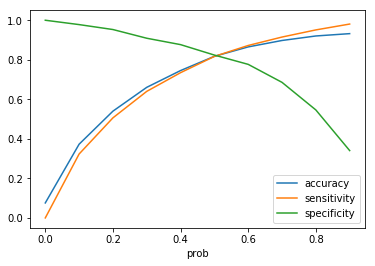

In [325]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [409]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

In [410]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )
confusion

array([[7036, 1269],
       [ 136,  545]], dtype=int64)

In [411]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.843645671043846

#### Accuracy with Logistic regression is around 85%

In [412]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP)
print(TN)
print(FP)
print(FN)

7036
545
1269
136


In [413]:
metrics.roc_auc_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.8237470836969044

#### The AUC_ROC score is around 82%

In [414]:
metrics.f1_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.43687374749499

## RandomForest

In [332]:
#### For selecting important features that directly affect the Churn rate can be derived using Randomforest

In [333]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight="balanced")
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [334]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

#Predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter: ',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter:  0.9424660583129312


In [335]:
print(classification_report(y_test,prediction_test))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8305
          1       0.72      0.40      0.51       681

avg / total       0.93      0.94      0.93      8986



In [336]:
#Confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[8199  106]
 [ 411  270]]


### Hyperparameter tuning

#### Tuning max_depth

In [337]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score='warn',
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [338]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.195320,0.003093,0.023372,0.005439,2,{'max_depth': 2},0.865881,0.886638,0.880066,0.877528,0.008662,4,0.875463,0.883989,0.886284,0.881912,0.004655
1,0.490972,0.004548,0.030347,0.003279,7,{'max_depth': 7},0.917258,0.917479,0.923416,0.919384,0.002852,1,0.956578,0.953438,0.956697,0.955571,0.001509
2,0.736322,0.008199,0.033983,0.000798,12,{'max_depth': 12},0.906097,0.906137,0.907992,0.906742,0.000884,2,0.993906,0.993700,0.995052,0.994219,0.000595
3,0.801637,0.004968,0.037672,0.003851,17,{'max_depth': 17},0.882469,0.896795,0.889999,0.889754,0.005851,3,0.999689,0.999574,0.999572,0.999611,0.000055


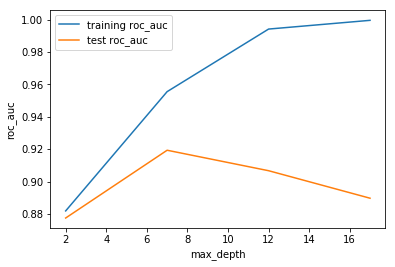

In [339]:
#Plot accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_depth")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

In [340]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score='warn',
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(50, 400, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [341]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.609962,0.036667,0.030346,0.000922,50,{'min_samples_leaf': 50},0.922795,0.920764,0.921912,0.921824,0.000831,4,0.952084,0.949772,0.951801,0.951219,0.001030
1,0.583642,0.008329,0.030337,0.000916,60,{'min_samples_leaf': 60},0.922605,0.923843,0.923127,0.923192,0.000507,2,0.951627,0.946267,0.947654,0.948516,0.002272
2,0.569315,0.014725,0.035997,0.008523,70,{'min_samples_leaf': 70},0.920651,0.922267,0.926700,0.923206,0.002557,1,0.947459,0.942427,0.946914,0.945600,0.002255
3,0.557965,0.004968,0.029014,0.000796,80,{'min_samples_leaf': 80},0.922673,0.921088,0.922310,0.922024,0.000678,3,0.945669,0.938806,0.943777,0.942751,0.002894
4,0.542967,0.013879,0.030332,0.002623,90,{'min_samples_leaf': 90},0.919842,0.918008,0.920773,0.919541,0.001149,8,0.942443,0.940766,0.938553,0.940587,0.001593


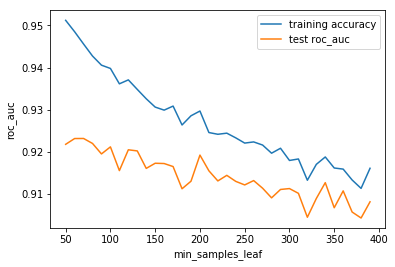

In [342]:
#Plot accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### Tuning min_samples_split

In [343]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score='warn',
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(100, 500, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [344]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.817282,0.028075,0.041681,0.007388,100,{'min_samples_split': 100},0.917898,0.922238,0.916476,0.918870,0.002451,10,0.968722,0.971008,0.968128,0.969286,0.001241
1,0.776953,0.017719,0.036681,0.004090,125,{'min_samples_split': 125},0.910818,0.924902,0.920736,0.918819,0.005908,11,0.962332,0.963743,0.964072,0.963382,0.000755
2,0.720987,0.002139,0.032652,0.000460,150,{'min_samples_split': 150},0.919311,0.925023,0.919708,0.921347,0.002604,5,0.963073,0.960139,0.962612,0.961942,0.001288
3,0.709640,0.030748,0.066996,0.048789,175,{'min_samples_split': 175},0.921149,0.922337,0.922538,0.922008,0.000613,3,0.960174,0.961319,0.960755,0.960749,0.000468
4,0.725623,0.009104,0.034339,0.002619,200,{'min_samples_split': 200},0.920739,0.922646,0.921389,0.921591,0.000792,4,0.957856,0.958211,0.955551,0.957206,0.001179


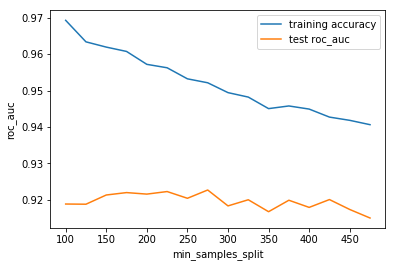

In [345]:
#Plot accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.



In [346]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [347]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.026562,1.077215,0.070427,0.002505,100,{'n_estimators': 100},0.906737,0.927300,0.926341,0.903555,...,0.915061,0.009923,4,0.927788,0.925194,0.923646,0.929820,0.924805,0.926250,0.002240
1,22.351644,1.285731,0.418390,0.172089,500,{'n_estimators': 500},0.909249,0.928686,0.930825,0.908241,...,0.918806,0.009468,1,0.929828,0.926769,0.926766,0.933661,0.928495,0.929104,0.002553
2,45.837208,4.032684,0.646380,0.133236,900,{'n_estimators': 900},0.907911,0.928405,0.930342,0.906715,...,0.917802,0.009951,2,0.929011,0.926815,0.926694,0.932107,0.928305,0.928586,0.001969
3,66.567743,3.627928,1.102368,0.459884,1300,{'n_estimators': 1300},0.907581,0.928017,0.929351,0.907208,...,0.917720,0.009552,3,0.929685,0.927164,0.925725,0.932402,0.928835,0.928762,0.002275


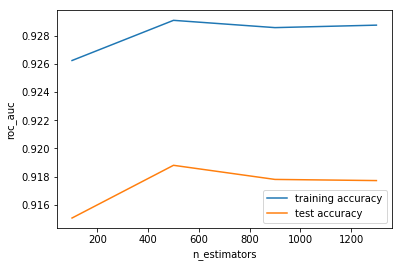

In [348]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.legend()
plt.show()


In [349]:
# Creating the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [400,800], 
    'max_features': [10,15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [350]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 28.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': range(100, 300, 100), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 300], 'max_features': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [351]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9403825058425145 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 200, 'min_samples_split': 200, 'n_estimators': 300}


In [383]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=200, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [384]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [385]:
# predict
predictions = rfc.predict(X_test)

In [386]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8305
          1       0.77      0.39      0.52       681

avg / total       0.94      0.95      0.94      8986



In [387]:
print(confusion_matrix(y_test,predictions))

[[8226   79]
 [ 413  268]]


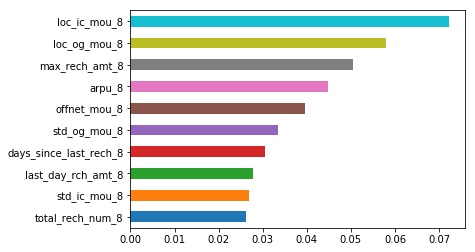

In [394]:
X = final_df
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X_train.columns.values
X = pd.DataFrame(X_scaler.transform(X_train))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [389]:
import pandas as pd
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [393]:
feature_importances.head(10)

,importance
loc_ic_mou_8,0.193515
arpu_8,0.131106
loc_og_mou_8,0.106686
max_rech_amt_8,0.074034
offnet_mou_8,0.068444
last_day_rch_amt_8,0.044471
onnet_mou_8,0.042703
std_ic_mou_8,0.029098
roam_og_mou_8,0.028475
av_rech_amt_data_8,0.026915


In [391]:
print(max(rfc.feature_importances_))

0.19351455624235842


In [392]:
#Making prediction on the test data
pred_probs_test= rfc.predict_proba(X_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.94'

#### The AUC score from randomforest is 94% 

### Driver variables identified from Random Forest

 - loc_ic_mou_8
 - arpu_8
 - loc_og_mou_8
 - max_rech_amt_8
 - offnet_mou_8
 - last_day_rch_amt_8
 - onnet_mou_8
 - std_ic_mou_8
 - roam_og_mou_8
 - av_rech_amt_data_8

#### Summary and suggestions
The driver variables obtained from Randomforest model corresponds to the visualizations in EDA where the decrease in local incoming, average revenue, local outgoing, max recharge amount, off-network especially during the 8th month (Action phase) are strong signs that the customer will Churn.
Whereas, the increase in roaming outgoing or STD incoming signals to customer Churn.  The company may reach out to such customers and offer better package plans to retain them.

## -------------------------------------------------THE END-----------------------------------------------------------